<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/GoogleNet_Toplu_Deneme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os  # 'os' modülünü ekleyin
import json  # 'json' modülünü ekleyin

# Veri yolu
train_data_dir = '/content/drive/MyDrive/MS-DENEME/train'
validation_data_dir = '/content/drive/MyDrive/MS-DENEME/val'
test_data_dir = '/content/drive/MyDrive/MS-DENEME/test'

# Parametreler
img_width, img_height = 224, 224
num_classes = 4  # Örnek bir değer, kullanılan sınıf sayısına göre güncellenmelidir
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001  # Tek bir öğrenme oranı

# Saklama için listeler
inception_histories = []

# Klasörü oluştur
output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)

# InceptionV3 için döngü
for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.Adam(learning_rate=inception_learning_rate)

        # InceptionV3 modelini oluştur
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        # Freeze the layers
        for layer in base_model.layers:
            layer.trainable = False

        # Özelleştirilmiş sınıflandırma başı ekle
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Veri artırımı konfigürasyonu
        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        # Modeli eğitme
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        # Modelin eğitim geçmişini sakla
        inception_histories.append({
            'model': 'InceptionV3',
            'optimizer': 'Adam',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })



Found 2056 images belonging to 4 classes.
Found 685 images belonging to 4 classes.
Epoch 1/15
64/64 [==============================] - 38s 531ms/step - loss: 0.8518 - accuracy: 0.6240 - val_loss: 0.6256 - val_accuracy: 0.7143
Epoch 2/15
64/64 [==============================] - 33s 523ms/step - loss: 0.6513 - accuracy: 0.6922 - val_loss: 0.6786 - val_accuracy: 0.7039
Epoch 3/15
64/64 [==============================] - 33s 516ms/step - loss: 0.5964 - accuracy: 0.7376 - val_loss: 0.6204 - val_accuracy: 0.7232
Epoch 4/15
64/64 [==============================] - 33s 517ms/step - loss: 0.5660 - accuracy: 0.7426 - val_loss: 0.5565 - val_accuracy: 0.7500
Epoch 5/15
64/64 [==============================] - 33s 515ms/step - loss: 0.5323 - accuracy: 0.7495 - val_loss: 0.5243 - val_accuracy: 0.7500
Epoch 6/15
64/64 [==============================] - 33s 523ms/step - loss: 0.5236 - accuracy: 0.7559 - val_loss: 0.5416 - val_accuracy: 0.7455
Epoch 7/15
64/64 [==============================] - 33s 518

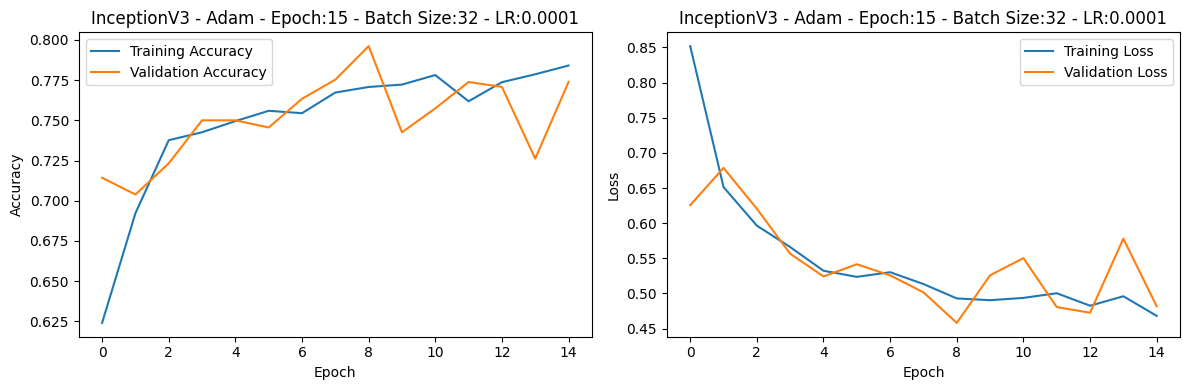

Found 686 images belonging to 4 classes.
22/22 [==============================] - 181s 9s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:15 - Batch Size:32 - LR:0.0001:
[[169  44   0   0]
 [ 21 111   0   0]
 [  1   0 166  38]
 [  0   1  18 117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       213
           1       0.71      0.84      0.77       132
           2       0.90      0.81      0.85       205
           3       0.75      0.86      0.80       136

    accuracy                           0.82       686
   macro avg       0.81      0.83      0.82       686
weighted avg       0.83      0.82      0.82       686

--------------------


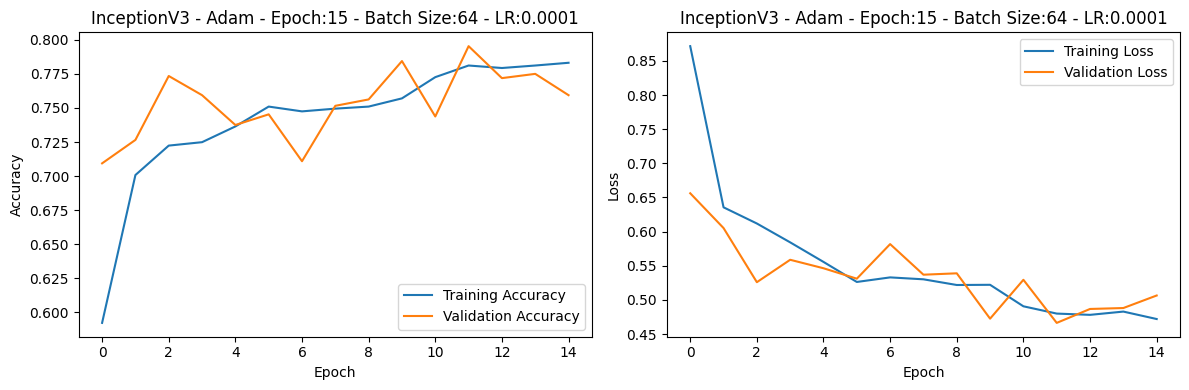

Found 686 images belonging to 4 classes.
11/11 [==============================] - 12s 1s/step
Confusion Matrix for InceptionV3 - Adam - Epoch:15 - Batch Size:64 - LR:0.0001:
[[174  39   0   0]
 [ 18 114   0   0]
 [  0   0 173  32]
 [  0   0  22 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       213
           1       0.75      0.86      0.80       132
           2       0.89      0.84      0.87       205
           3       0.78      0.84      0.81       136

    accuracy                           0.84       686
   macro avg       0.83      0.84      0.83       686
weighted avg       0.84      0.84      0.84       686

--------------------


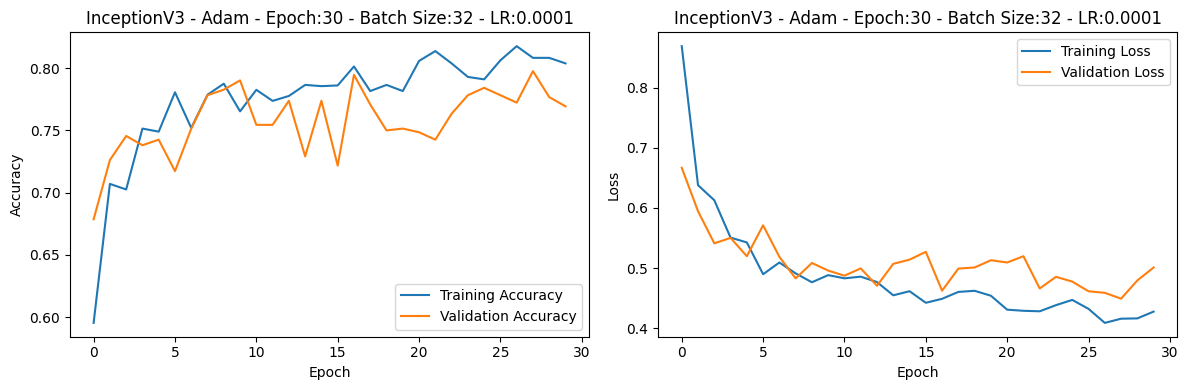

Found 686 images belonging to 4 classes.
22/22 [==============================] - 8s 379ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:30 - Batch Size:32 - LR:0.0001:
[[175  37   1   0]
 [ 19 112   1   0]
 [  0   0 157  48]
 [  0   0  24 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       213
           1       0.75      0.85      0.80       132
           2       0.86      0.77      0.81       205
           3       0.70      0.82      0.76       136

    accuracy                           0.81       686
   macro avg       0.80      0.81      0.81       686
weighted avg       0.82      0.81      0.81       686

--------------------


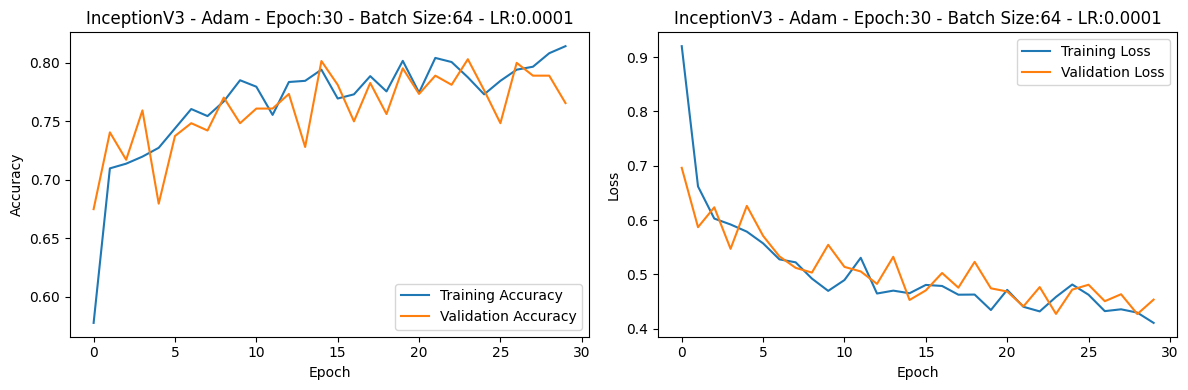

Found 686 images belonging to 4 classes.
11/11 [==============================] - 8s 760ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:30 - Batch Size:64 - LR:0.0001:
[[172  41   0   0]
 [ 16 116   0   0]
 [  0   0 167  38]
 [  0   0  29 107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       213
           1       0.74      0.88      0.80       132
           2       0.85      0.81      0.83       205
           3       0.74      0.79      0.76       136

    accuracy                           0.82       686
   macro avg       0.81      0.82      0.81       686
weighted avg       0.83      0.82      0.82       686

--------------------


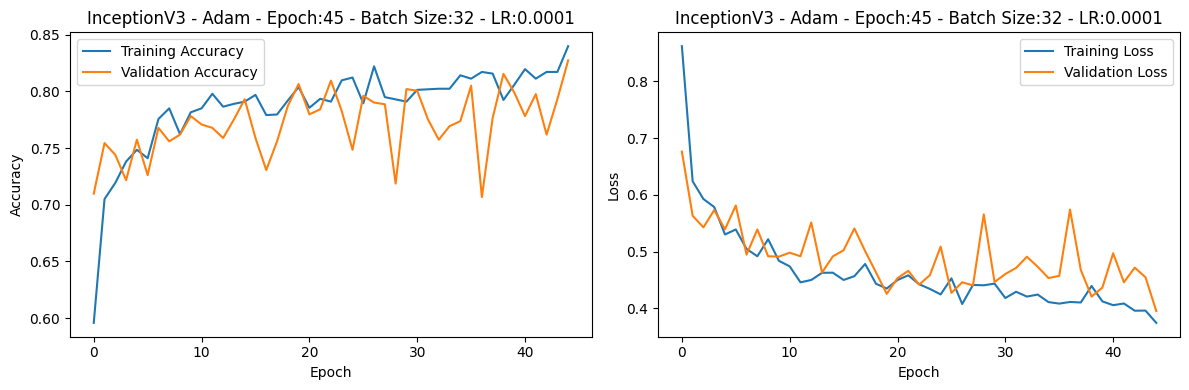

Found 686 images belonging to 4 classes.
22/22 [==============================] - 8s 373ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:45 - Batch Size:32 - LR:0.0001:
[[172  40   0   1]
 [ 18 114   0   0]
 [  0   0 172  33]
 [  0   0  21 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       213
           1       0.74      0.86      0.80       132
           2       0.89      0.84      0.86       205
           3       0.77      0.85      0.81       136

    accuracy                           0.84       686
   macro avg       0.83      0.84      0.83       686
weighted avg       0.84      0.84      0.84       686

--------------------


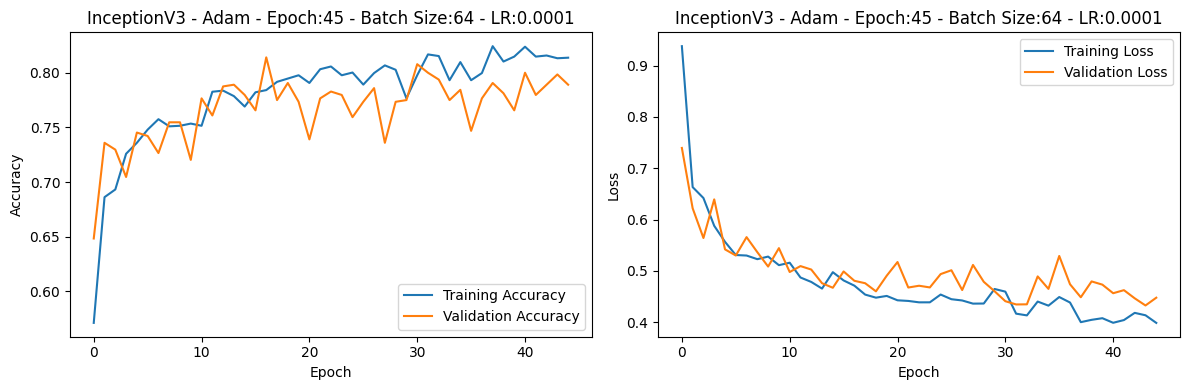

Found 686 images belonging to 4 classes.
11/11 [==============================] - 8s 762ms/step
Confusion Matrix for InceptionV3 - Adam - Epoch:45 - Batch Size:64 - LR:0.0001:
[[170  43   0   0]
 [ 14 118   0   0]
 [  0   0 166  39]
 [  0   0  23 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       213
           1       0.73      0.89      0.81       132
           2       0.88      0.81      0.84       205
           3       0.74      0.83      0.78       136

    accuracy                           0.83       686
   macro avg       0.82      0.83      0.82       686
weighted avg       0.84      0.83      0.83       686

--------------------


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Eğitim geçmişlerini inceleyebilir ve karşılaştırabilirsiniz
for history in inception_histories:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    # Eğitim ve validation accuracy grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Eğitim ve validation loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion matrix ve classification report
    # Test verileri üzerinde modeli değerlendirme
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False  # Sıralı olarak almak için shuffle kapatılır
    )

    # Tahminleri al
    predictions = model.predict(test_generator)

    # En yüksek olasılığa sahip sınıfı tahmin olarak seç
    y_pred = np.argmax(predictions, axis=1)

    # Gerçek etiketleri al
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification report
    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os  # 'os' modülünü ekleyin
import json  # 'json' modülünü ekleyin


# Veri yolu
train_data_dir = '/content/drive/MyDrive/MS-DENEME/train'
validation_data_dir = '/content/drive/MyDrive/MS-DENEME/val'
test_data_dir = '/content/drive/MyDrive/MS-DENEME/test'


# Parametreler
img_width, img_height = 224, 224
num_classes = 4  # Örnek bir değer, kullanılan sınıf sayısına göre güncellenmelidir
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001  # Tek bir öğrenme oranı

# Saklama için listeler
inception_histories2 = []

# Klasörü oluştur
output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)

# InceptionV3 için döngü
for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=inception_learning_rate)

        # InceptionV3 modelini oluştur
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        # Freeze the layers
        for layer in base_model.layers:
            layer.trainable = False

        # Özelleştirilmiş sınıflandırma başı ekle
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Veri artırımı konfigürasyonu
        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        # Modeli eğitme
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        # Modelin eğitim geçmişini sakla
        inception_histories2.append({
            'model': 'InceptionV3',
            'optimizer': 'RMSprop',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })



87910968/87910968 [==============================] - 0s 0us/step
Found 2056 images belonging to 4 classes.
Found 685 images belonging to 4 classes.
Epoch 1/15
64/64 [==============================] - 669s 10s/step - loss: 0.8939 - accuracy: 0.6008 - val_loss: 0.7753 - val_accuracy: 0.6652
Epoch 2/15
64/64 [==============================] - 35s 549ms/step - loss: 0.6916 - accuracy: 0.6789 - val_loss: 0.6186 - val_accuracy: 0.7083
Epoch 3/15
64/64 [==============================] - 35s 551ms/step - loss: 0.6450 - accuracy: 0.7085 - val_loss: 0.5333 - val_accuracy: 0.7574
Epoch 4/15
64/64 [==============================] - 35s 554ms/step - loss: 0.6131 - accuracy: 0.7060 - val_loss: 0.5437 - val_accuracy: 0.7545
Epoch 5/15
64/64 [==============================] - 35s 547ms/step - loss: 0.5769 - accuracy: 0.7292 - val_loss: 0.5839 - val_accuracy: 0.7217
Epoch 6/15
64/64 [==============================] - 35s 547ms/step - loss: 0.5560 - accuracy: 0.7233 - val_loss: 0.5749 - val_accuracy: 0.

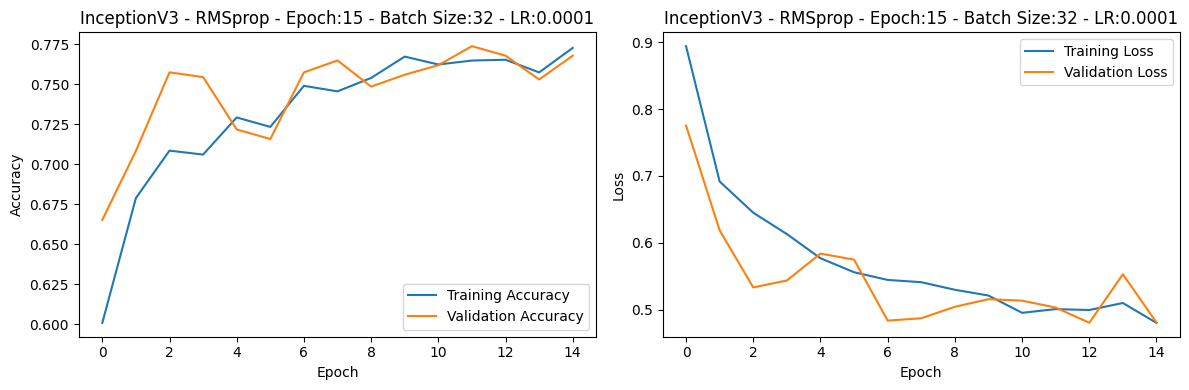

Found 686 images belonging to 4 classes.
22/22 [==============================] - 151s 7s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:32 - LR:0.0001:
[[194  19   0   0]
 [ 32  99   0   1]
 [  0   0 166  39]
 [  0   0  17 119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       213
           1       0.84      0.75      0.79       132
           2       0.91      0.81      0.86       205
           3       0.75      0.88      0.81       136

    accuracy                           0.84       686
   macro avg       0.84      0.84      0.83       686
weighted avg       0.85      0.84      0.84       686

--------------------


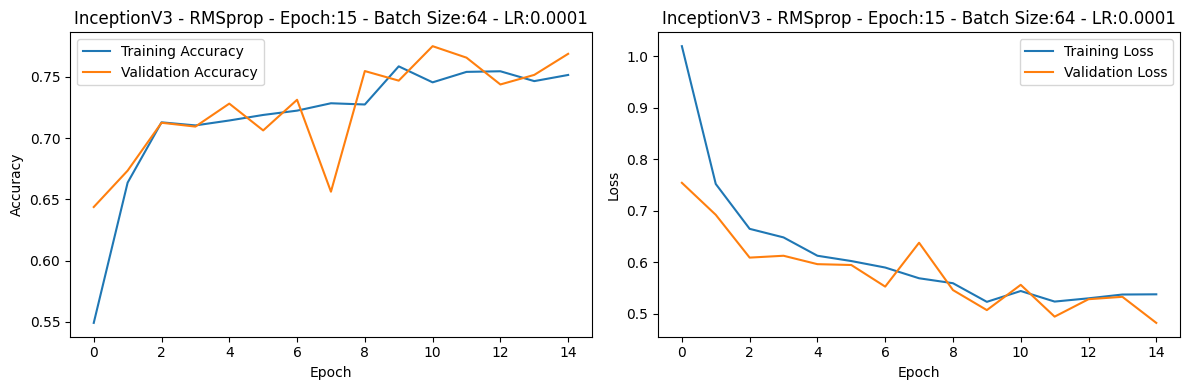

Found 686 images belonging to 4 classes.
11/11 [==============================] - 12s 1s/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:15 - Batch Size:64 - LR:0.0001:
[[191  22   0   0]
 [ 34  98   0   0]
 [  0   0 163  42]
 [  1   1  25 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       213
           1       0.81      0.74      0.77       132
           2       0.87      0.80      0.83       205
           3       0.72      0.80      0.76       136

    accuracy                           0.82       686
   macro avg       0.81      0.81      0.81       686
weighted avg       0.82      0.82      0.82       686

--------------------


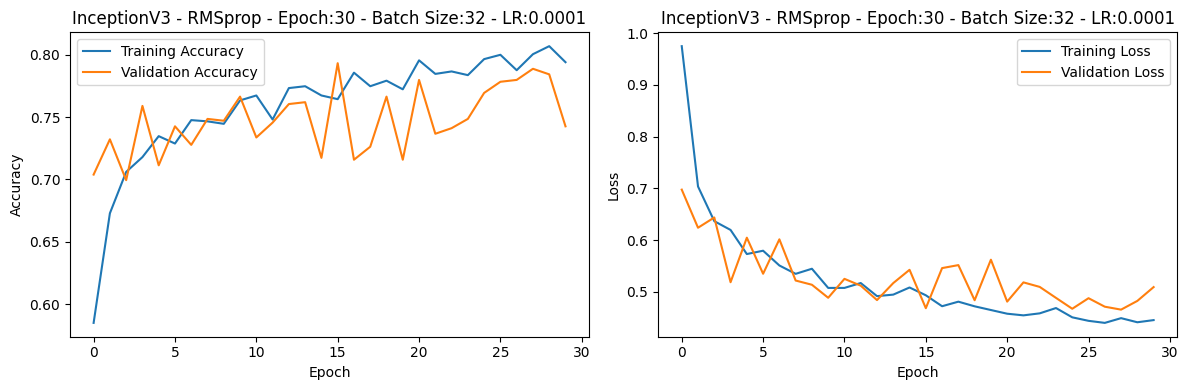

Found 686 images belonging to 4 classes.
22/22 [==============================] - 8s 368ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:32 - LR:0.0001:
[[187  26   0   0]
 [ 32  99   1   0]
 [  2   0 165  38]
 [  0   0  28 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       213
           1       0.79      0.75      0.77       132
           2       0.85      0.80      0.83       205
           3       0.74      0.79      0.77       136

    accuracy                           0.81       686
   macro avg       0.81      0.81      0.81       686
weighted avg       0.82      0.81      0.81       686

--------------------


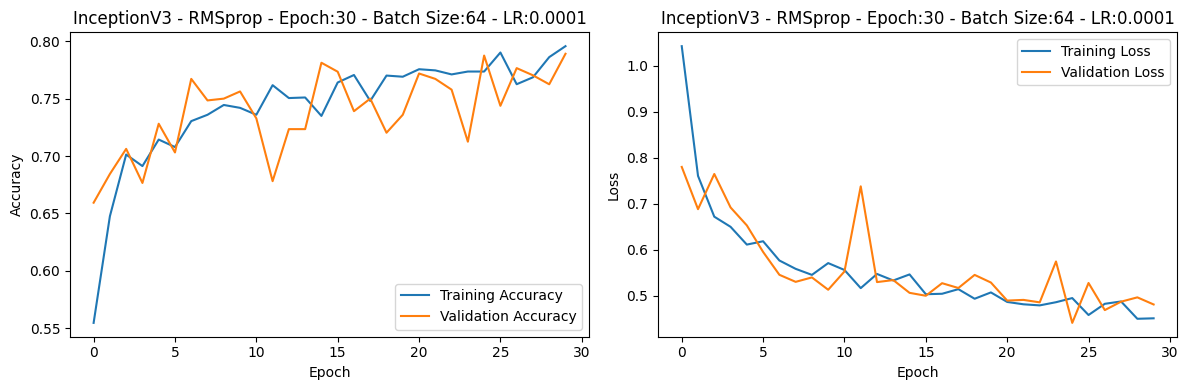

Found 686 images belonging to 4 classes.
11/11 [==============================] - 9s 766ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:30 - Batch Size:64 - LR:0.0001:
[[182  31   0   0]
 [ 33  99   0   0]
 [  1   0 164  40]
 [  0   0  22 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       213
           1       0.76      0.75      0.76       132
           2       0.88      0.80      0.84       205
           3       0.74      0.84      0.79       136

    accuracy                           0.81       686
   macro avg       0.81      0.81      0.81       686
weighted avg       0.82      0.81      0.82       686

--------------------


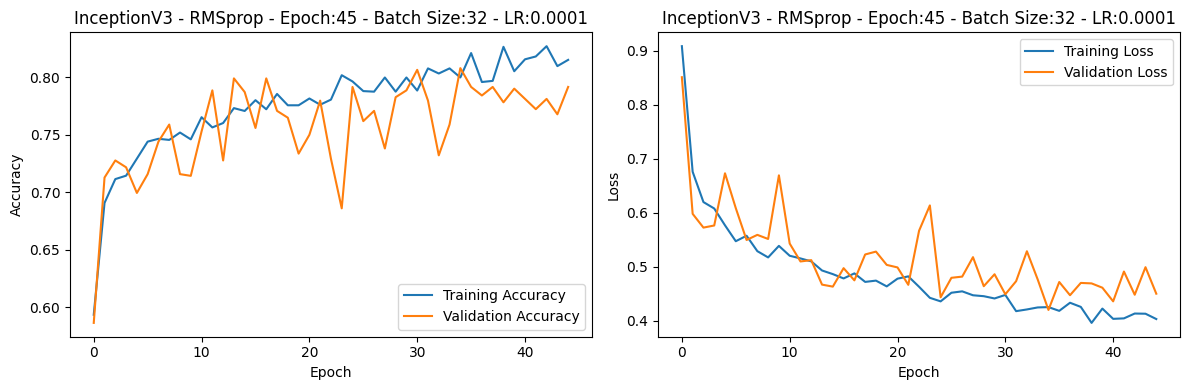

Found 686 images belonging to 4 classes.
22/22 [==============================] - 8s 373ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:32 - LR:0.0001:
[[179  33   1   0]
 [ 35  97   0   0]
 [  1   1 161  42]
 [  0   1  24 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       213
           1       0.73      0.73      0.73       132
           2       0.87      0.79      0.82       205
           3       0.73      0.82      0.77       136

    accuracy                           0.80       686
   macro avg       0.79      0.79      0.79       686
weighted avg       0.80      0.80      0.80       686

--------------------


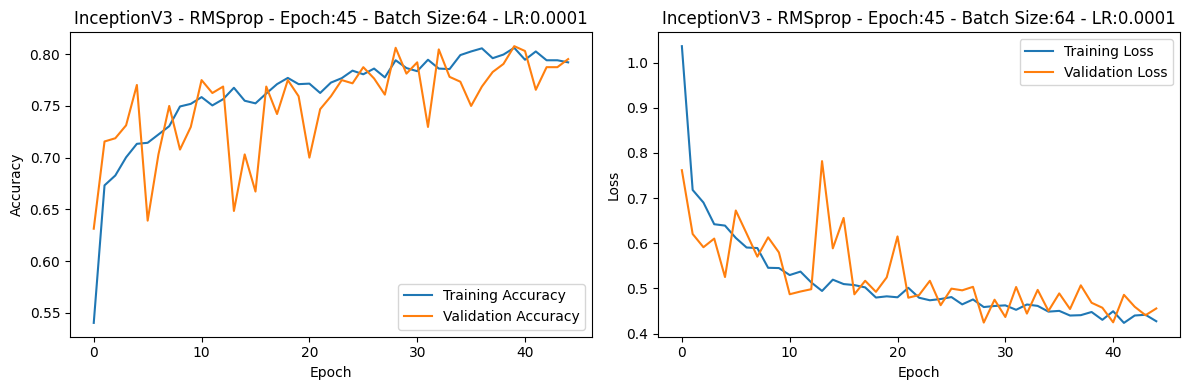

Found 686 images belonging to 4 classes.
11/11 [==============================] - 8s 764ms/step
Confusion Matrix for InceptionV3 - RMSprop - Epoch:45 - Batch Size:64 - LR:0.0001:
[[187  26   0   0]
 [ 36  96   0   0]
 [  0   0 168  37]
 [  0   0  20 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       213
           1       0.79      0.73      0.76       132
           2       0.89      0.82      0.85       205
           3       0.76      0.85      0.80       136

    accuracy                           0.83       686
   macro avg       0.82      0.82      0.82       686
weighted avg       0.83      0.83      0.83       686

--------------------


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Eğitim geçmişlerini inceleyebilir ve karşılaştırabilirsiniz
for history in inception_histories2:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    # Eğitim ve validation accuracy grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Eğitim ve validation loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion matrix ve classification report
    # Test verileri üzerinde modeli değerlendirme
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False  # Sıralı olarak almak için shuffle kapatılır
    )

    # Tahminleri al
    predictions = model.predict(test_generator)

    # En yüksek olasılığa sahip sınıfı tahmin olarak seç
    y_pred = np.argmax(predictions, axis=1)

    # Gerçek etiketleri al
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification report
    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os  # 'os' modülünü ekleyin
import json  # 'json' modülünü ekleyin

# Veri yolu
train_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Valid'
test_data_dir = '/content/drive/MyDrive/Mezuniyet_Calismasi/Data/Test'

# Parametreler
img_width, img_height = 224, 224
num_classes = 12  # Örnek bir değer, kullanılan sınıf sayısına göre güncellenmelidir
inception_epochs = [15, 30, 45]
inception_batch_sizes = [32, 64]
inception_learning_rate = 0.0001  # Tek bir öğrenme oranı

# Saklama için listeler
inception_histories3 = []

# Klasörü oluştur
output_folder = '/content/drive/MyDrive/Mezuniyet_Calismasi/'
os.makedirs(output_folder, exist_ok=True)

# InceptionV3 için döngü
for epoch in inception_epochs:
    for batch_size in inception_batch_sizes:
        optimizer = tf.keras.optimizers.SGD(learning_rate=inception_learning_rate)

        # InceptionV3 modelini oluştur
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

        # Freeze the layers
        for layer in base_model.layers:
            layer.trainable = False

        # Özelleştirilmiş sınıflandırma başı ekle
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(num_classes, activation='softmax')(x)

        model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Veri artırımı konfigürasyonu
        train_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        test_datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            rescale=1./255
        )

        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        validation_generator = test_datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode='categorical')

        # Modeli eğitme
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=epoch,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size
        )

        # Modelin eğitim geçmişini sakla
        inception_histories3.append({
            'model': 'InceptionV3',
            'optimizer': 'RMSprop',
            'learning_rate': inception_learning_rate,
            'epoch': epoch,
            'batch_size': batch_size,
            'history': history.history
        })

# Eğitim geçmişlerini dosyaya kaydet
file_path = os.path.join(output_folder, 'inception_histories3.json')
with open(file_path, 'w') as file:
    json.dump(inception_histories3, file)

# Eğitim geçmişlerini dosyadan yükle
with open(file_path, 'r') as file:
    loaded_histories = json.load(file)

# Yüklenen eğitim geçmişlerini incele
for history in loaded_histories:
    print(f"Model: {history['model']}, Optimizer: {history['optimizer']}, Learning Rate: {history['learning_rate']}, Epoch: {history['epoch']}, Batch Size: {history['batch_size']}")
    # İlgili eğitim geçmişi bilgilerini görselleştirme veya değerlendirme işlemleri yapabilirsiniz
    # Örneğin, accuracy ve loss grafiği çizimi, confusion matrix, classification report vb.
    print("--------------------")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Eğitim geçmişlerini inceleyebilir ve karşılaştırabilirsiniz
for history in inception_histories3:
    model_name = history['model']
    optimizer_name = history['optimizer']
    epoch_num = history['epoch']
    batch_size_num = history['batch_size']
    learning_rate_num = history['learning_rate']

    # Eğitim ve validation accuracy grafiği
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['history']['accuracy'], label='Training Accuracy')
    plt.plot(history['history']['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Eğitim ve validation loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history['history']['loss'], label='Training Loss')
    plt.plot(history['history']['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Confusion matrix ve classification report
    # Test verileri üzerinde modeli değerlendirme
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size_num,
        class_mode='categorical',
        shuffle=False  # Sıralı olarak almak için shuffle kapatılır
    )

    # Tahminleri al
    predictions = model.predict(test_generator)

    # En yüksek olasılığa sahip sınıfı tahmin olarak seç
    y_pred = np.argmax(predictions, axis=1)

    # Gerçek etiketleri al
    y_true = test_generator.classes

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification report
    cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

    print(f'Confusion Matrix for {model_name} - {optimizer_name} - Epoch:{epoch_num} - Batch Size:{batch_size_num} - LR:{learning_rate_num}:')
    print(cm)
    print('\nClassification Report:')
    print(cr)
    print('--------------------')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
